STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [ ]:
## data collection
import pandas_datareader as pdr
import pandas as pd


In [ ]:
df = pd.read_csv(r'/content/AAPL.csv')
print(df.columns)

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')


In [ ]:
## stock prediction for close column
df1 = df.reset_index()['close']
df1.shape

(1258,)

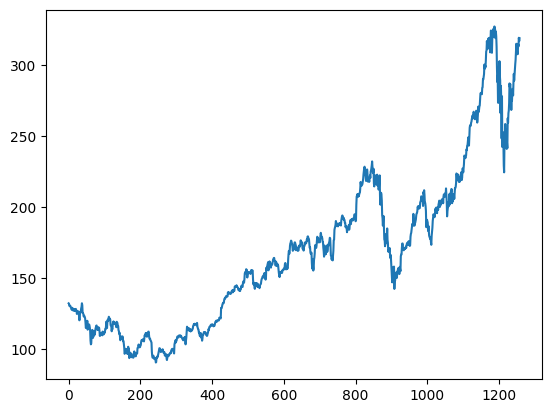

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
df1


,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))



In [ ]:
df1_scaled

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
df1_scaled.shape

(1258, 1)

In [ ]:
## splitting data into train and test
training_size = int(len(df1_scaled)*0.65)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size, :], df1_scaled[training_size:len(df1_scaled), :1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [ ]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

LSTM MODEL

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
## create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - loss: 0.0298 - val_loss: 0.0613
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0011 - val_loss: 0.0083
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 7.9370e-04 - val_loss: 0.0040
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 6.9445e-04 - val_loss: 0.0044
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 5.9874e-04 - val_loss: 0.0041
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - loss: 6.4386e-04 - val_loss: 0.0038
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 6.2400e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 5.8169e-04 - val_loss: 0.0038
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 5.7773e-04 - val_loss: 0.0038
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - loss: 5.7023e-04 - val_loss: 0.0036
Epoch 12/

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.88657404293804

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

241.20834289585645

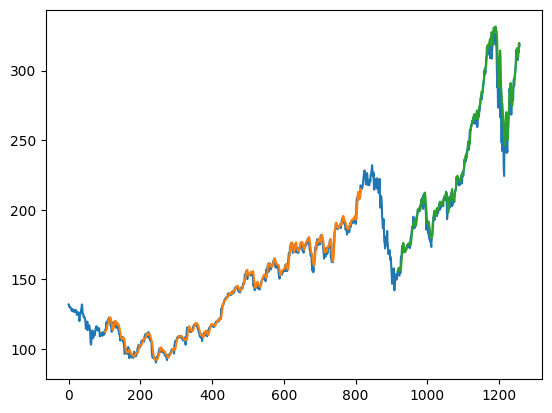

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)


441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9827925]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

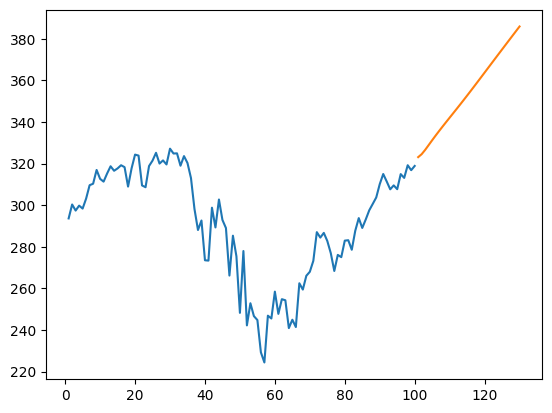

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

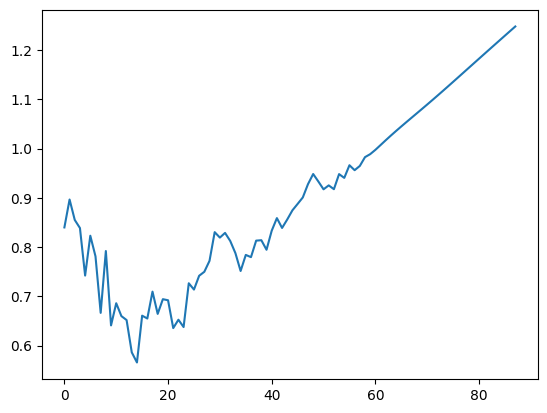

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()

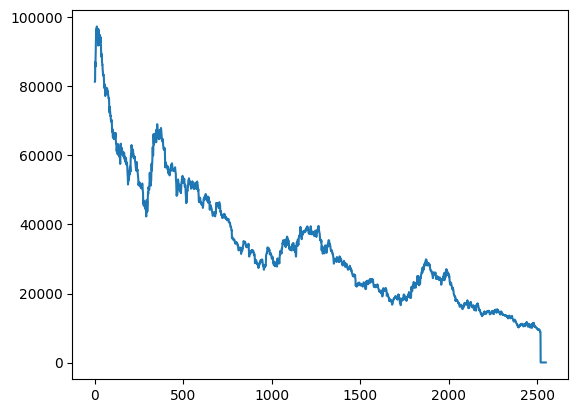

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)